In [1]:
#import anndata
import destvi_utils
import matplotlib.pyplot as plt
import scanpy as sc
import numpy as np
import scvi
from scvi.model import CondSCVI, DestVI
import pandas as pd
######        dataset de caov filtrado
# caov = sc.read_visium("C:\\Users\\pedro\\OneDrive\\Área de Trabalho\\spatial_ovary\\Ovary_v4\\data\\10x1")
# caov.var_names_make_unique()
#PROJDIR = "/home/pedrovideira/Desktop/Pedro/Ovary_v4"
#MODDIR = "/home/pedrovideira/Desktop/Pedro/Ovary_v4/data/model"
#MODFILE = "/home/pedrovideira/Desktop/Pedro/Ovary_v4/data/model/local.h5ad"
#QUERYDIR = "/home/pedrovideira/Desktop/Pedro/Ovary_v4/data/10x1"

#

#caov = sc.read_visium("/home/pedrovideira/Desktop/Pedro/Ovary_v4/data/10x2")
#caov = sc.read_visium("/home/pedrovideira/Desktop/Pedro/Ovary_v4/data/10x4")

#caov.var_names_make_unique()

c:\Users\pedro\mambaforge\envs\mambenv\lib\site-packages\scvi\_settings.py:63: UserWarning: Since v1.0.0, scvi-tools no longer uses a random seed by default. Run `scvi.settings.seed = 0` to reproduce results from previous versions.
  self.seed = seed
c:\Users\pedro\mambaforge\envs\mambenv\lib\site-packages\scvi\_settings.py:70: UserWarning: Setting `dl_pin_memory_gpu_training` is deprecated in v1.0 and will be removed in v1.1. Please pass in `pin_memory` to the data loaders instead.
  self.dl_pin_memory_gpu_training = (
c:\Users\pedro\mambaforge\envs\mambenv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
scvi.settings.seed = 0
print("Last run with scvi-tools version:", scvi.__version__)

Global seed set to 0


Last run with scvi-tools version: 1.0.3


In [3]:
sc.set_figure_params(figsize=(4, 4), frameon=False)

In [4]:
st_adata = sc.read_visium("C:\\Users\\pedro\\OneDrive\\Área de Trabalho\\projeto_INCA\\spatial_ovary\\Ovary_v4\\\data\\10x2")

c:\Users\pedro\mambaforge\envs\mambenv\lib\site-packages\anndata\_core\anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [6]:
#st_adata = st_adata.write_h5ad("C:\\Users\\pedro\\OneDrive\\Área de Trabalho\\projeto_INCA\\spatial_ovary\\Ovary_v4\\\data\\10x2.h5ad")

In [7]:
#st_adata = sc.read_h5ad("C:\\Users\\pedro\\OneDrive\\Área de Trabalho\projeto_INCA\\\spatial_ovary\\Ovary_v4\\data\\10x2.h5ad")

In [5]:
st_adata.var_names_make_unique()

In [6]:
def pp(adata):
    adata.var["mt"] = adata.var_names.str.startswith("MT-")
    sc.pp.calculate_qc_metrics(adata, qc_vars=["mt"], inplace=True)
    sc.pp.filter_cells(adata, min_counts=3500)
    sc.pp.filter_cells(adata, max_counts=35000)
    adata = adata[adata.obs["pct_counts_mt"] < 20]
    sc.pp.filter_genes(adata, min_cells=10)  
    sc.pp.normalize_total(adata, target_sum=10e4)
    sc.pp.log1p(adata)
    sc.pp.highly_variable_genes(adata, flavor="seurat", n_top_genes=2000)  
    sc.pp.pca(adata)
    sc.pp.neighbors(adata)
    sc.tl.umap(adata)
    return adata

In [7]:
st_adata = pp(st_adata)

c:\Users\pedro\mambaforge\envs\mambenv\lib\site-packages\scanpy\preprocessing\_simple.py:251: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
c:\Users\pedro\mambaforge\envs\mambenv\lib\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
c:\Users\pedro\mambaforge\envs\mambenv\lib\site-packages\umap\distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba

In [8]:
st_adata.layers["counts"] = st_adata.X.copy()
st_adata.obsm["spatial"] = st_adata.obsm["spatial"]
st_adata.raw = st_adata

In [9]:
#I have done the 0.1 filtration and extraction of the underexpressed celltype
sc_adata = sc.read_h5ad("C:\\Users\\pedro\\OneDrive\\Área de Trabalho\\projeto_INCA\\spatial_ovary\\Ovary_v4\\data\\cellxgene_ovc_subset_raw.h5ad")

c:\Users\pedro\mambaforge\envs\mambenv\lib\site-packages\anndata\_core\anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [10]:
sc_adata.obs_keys

<bound method AnnData.obs_keys of AnnData object with n_obs × n_vars = 92984 × 31897
    obs: 'percent.mt', 'percent.rb', 'doublet', 'author_sample_id', 'S.Score', 'G2M.Score', 'Phase', 'CC.Diff', 'author_cell_type', 'nCount_RNA', 'nFeature_RNA', 'doublet_score', 'cell_id', 'organism_ontology_term_id', 'cell_type_ontology_term_id', 'tissue_ontology_term_id', 'assay_ontology_term_id', 'suspension_type', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'development_stage_ontology_term_id', 'sex_ontology_term_id', 'donor_id', 'author_tumor_supersite', 'author_tumor_site', 'author_tumor_subsite', 'author_sort_parameters', 'author_therapy', 'author_procedure', 'author_procedure_type', 'is_primary_data', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage'
    var: 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype'
    uns: 'author_cell_type_colors', 'default_embedding', 'neighbors', 'sc

In [11]:
sc_adata.var.head()

,feature_is_filtered,feature_name,feature_reference,feature_biotype
gene_ids,,,,
ENSG00000243485,True,MIR1302-2HG,NCBITaxon:9606,gene
ENSG00000186092,True,OR4F5,NCBITaxon:9606,gene
ENSG00000238009,True,RP11-34P13.7,NCBITaxon:9606,gene
ENSG00000239945,True,RP11-34P13.8,NCBITaxon:9606,gene
ENSG00000241599,True,RP11-34P13.9,NCBITaxon:9606,gene


In [12]:
sc_adata.obs.head()

,percent.mt,percent.rb,doublet,author_sample_id,S.Score,G2M.Score,Phase,CC.Diff,author_cell_type,nCount_RNA,...,author_procedure_type,is_primary_data,cell_type,assay,disease,organism,sex,tissue,self_reported_ethnicity,development_stage
cell_id,,,,,,,,,,,,,,,,,,,,,
SPECTRUM-OV-107_S1_CD45N_RIGHT_ADNEXA_AAAGTGAGTACCGTCG,19.554073,27.321182,False,SPECTRUM-OV-107_S1_CD45N_RIGHT_ADNEXA,0.287920,-0.012686,S,0.300606,Ovarian.cancer.cell,24578,...,Primary Debulking,True,fallopian tube secretory epithelial cell,10x 3' v3,malignant ovarian serous tumor,Homo sapiens,female,adnexa of uterus,European,60-year-old human stage
SPECTRUM-OV-107_S1_CD45N_RIGHT_ADNEXA_AAAGTGATCACGACTA,23.133915,15.946035,False,SPECTRUM-OV-107_S1_CD45N_RIGHT_ADNEXA,0.034336,-0.270597,S,0.304934,Ovarian.cancer.cell,18086,...,Primary Debulking,True,fallopian tube secretory epithelial cell,10x 3' v3,malignant ovarian serous tumor,Homo sapiens,female,adnexa of uterus,European,60-year-old human stage
SPECTRUM-OV-107_S1_CD45N_RIGHT_ADNEXA_AAATGGAAGAGAATCT,7.663100,25.440111,False,SPECTRUM-OV-107_S1_CD45N_RIGHT_ADNEXA,-0.032844,-0.088485,G1,0.055640,Ovarian.cancer.cell,8691,...,Primary Debulking,True,fallopian tube secretory epithelial cell,10x 3' v3,malignant ovarian serous tumor,Homo sapiens,female,adnexa of uterus,European,60-year-old human stage
SPECTRUM-OV-107_S1_CD45N_RIGHT_ADNEXA_AACCCAAGTACGATGG,17.491917,9.383123,False,SPECTRUM-OV-107_S1_CD45N_RIGHT_ADNEXA,-0.231347,-0.369328,G1,0.137980,Ovarian.cancer.cell,15773,...,Primary Debulking,True,fallopian tube secretory epithelial cell,10x 3' v3,malignant ovarian serous tumor,Homo sapiens,female,adnexa of uterus,European,60-year-old human stage
SPECTRUM-OV-107_S1_CD45N_RIGHT_ADNEXA_AACGAAAGTGTTAAAG,11.854647,18.635822,False,SPECTRUM-OV-107_S1_CD45N_RIGHT_ADNEXA,-0.070440,-0.190662,G1,0.120222,Ovarian.cancer.cell,10072,...,Primary Debulking,True,fallopian tube secretory epithelial cell,10x 3' v3,malignant ovarian serous tumor,Homo sapiens,female,adnexa of uterus,European,60-year-old human stage


In [14]:
#sc_adata = sc_adata.to_memory()

In [13]:
# filter genes to be the same on the spatial data
intersect = np.intersect1d(sc_adata.var_names, st_adata.var_names)
st_adata = st_adata[:, intersect].copy()
sc_adata = sc_adata[:, intersect].copy()
G = len(intersect)

In [14]:
sc_adata.layers["counts"] = sc_adata.X.copy()

In [18]:
sc_adata.obs_keys

<bound method AnnData.obs_keys of AnnData object with n_obs × n_vars = 92984 × 0
    obs: 'percent.mt', 'percent.rb', 'doublet', 'author_sample_id', 'S.Score', 'G2M.Score', 'Phase', 'CC.Diff', 'author_cell_type', 'nCount_RNA', 'nFeature_RNA', 'doublet_score', 'cell_id', 'organism_ontology_term_id', 'cell_type_ontology_term_id', 'tissue_ontology_term_id', 'assay_ontology_term_id', 'suspension_type', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'development_stage_ontology_term_id', 'sex_ontology_term_id', 'donor_id', 'author_tumor_supersite', 'author_tumor_site', 'author_tumor_subsite', 'author_sort_parameters', 'author_therapy', 'author_procedure', 'author_procedure_type', 'is_primary_data', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage'
    var: 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype'
    uns: 'author_cell_type_colors', 'default_embedding', 'neighbors', 'schema

In [19]:
CondSCVI.setup_anndata(sc_adata, layer="counts", labels_key="cell_type")

In [20]:
sc_model = CondSCVI(sc_adata, weight_obs=False)
sc_model.view_anndata_setup()

c:\Users\pedro\mambaforge\envs\mambenv\lib\site-packages\torch\nn\init.py:405: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")


Anndata setup with scvi-tools version 1.0.3.

Setup via `CondSCVI.setup_anndata` with arguments:

{'labels_key': 'cell_type', 'layer': 'counts'}

     Summary Statistics     
┏━━━━━━━━━━━━━━━━━━┳━━━━━━━┓
┃ Summary Stat Key ┃ Value ┃
┡━━━━━━━━━━━━━━━━━━╇━━━━━━━┩
│     n_cells      │ 92984 │
│     n_labels     │   9   │
│      n_vars      │   0   │
└──────────────────┴───────┘

               Data Registry                
┏━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Registry Key ┃    scvi-tools Location    ┃
┡━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│      X       │  adata.layers['counts']   │
│    labels    │ adata.obs['_scvi_labels'] │
└──────────────┴───────────────────────────┘

                                   labels State Registry                                   
┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃    Source Location     ┃                Categories                ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['cell_type'] │                fibroblast                │          0          │
│                        │                  T cell                  │          1          │
│                        │                mast cell                 │          2          │
│                        │             endothelial cell             │          3          │
│                        │                  B cell                  │          4          │
│                        │              dendritic cell              │          5          │
│                        │               plasma cell                │          6          │
│                        │ fallopian tube secretory epithelial cell │          7          │
│                        │                 monocyte                 │          8          │
└────────────────────────┴──────────────────────────────────────────┴─────────────────────┘

In [21]:
sc_model.train()

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Epoch 72/300:  24%|██▎       | 71/300 [04:17<13:46,  3.61s/it, v_num=1, train_loss_step=1.13e-5, train_loss_epoch=8.28e-6]  

c:\Users\pedro\mambaforge\envs\mambenv\lib\site-packages\lightning\pytorch\trainer\call.py:53: UserWarning: Detected KeyboardInterrupt, attempting graceful shutdown...
  rank_zero_warn("Detected KeyboardInterrupt, attempting graceful shutdown...")


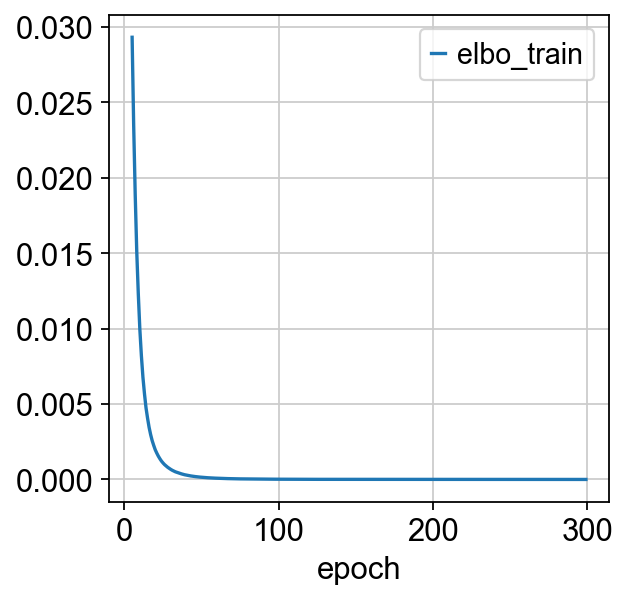

In [16]:
sc_model.history["elbo_train"].iloc[5:].plot()
plt.show()

In [26]:
DestVI.setup_anndata(st_adata, layer="counts")

In [27]:
st_model = DestVI.from_rna_model(st_adata, sc_model)
st_model.view_anndata_setup()

c:\Users\pedro\mambaforge\envs\mambenv\lib\site-packages\sklearn\base.py:1151: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (15). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
c:\Users\pedro\mambaforge\envs\mambenv\lib\site-packages\sklearn\base.py:1151: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (15). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
c:\Users\pedro\mambaforge\envs\mambenv\lib\site-packages\sklearn\base.py:1151: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (15). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
c:\Users\pedro\mambaforge\envs\mambenv\lib\site-packages\sklearn\base.py:1151: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (15). Possibly due to duplicate points in X.
  return fit_method(estimator, *

Anndata setup with scvi-tools version 1.0.3.

Setup via `DestVI.setup_anndata` with arguments:

{'layer': 'counts'}

     Summary Statistics     
┏━━━━━━━━━━━━━━━━━━┳━━━━━━━┓
┃ Summary Stat Key ┃ Value ┃
┡━━━━━━━━━━━━━━━━━━╇━━━━━━━┩
│     n_cells      │ 3493  │
│      n_vars      │   0   │
└──────────────────┴───────┘

              Data Registry              
┏━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Registry Key ┃  scvi-tools Location   ┃
┡━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│      X       │ adata.layers['counts'] │
│    ind_x     │ adata.obs['_indices']  │
└──────────────┴────────────────────────┘

In [31]:
st_model.train(max_epochs=500) # número diminuído devido a demora em carregar

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Epoch 500/500: 100%|██████████| 500/500 [01:56<00:00,  4.28it/s, v_num=1, train_loss_step=nan, train_loss_epoch=nan]

`Trainer.fit` stopped: `max_epochs=500` reached.


Epoch 500/500: 100%|██████████| 500/500 [01:56<00:00,  4.30it/s, v_num=1, train_loss_step=nan, train_loss_epoch=nan]


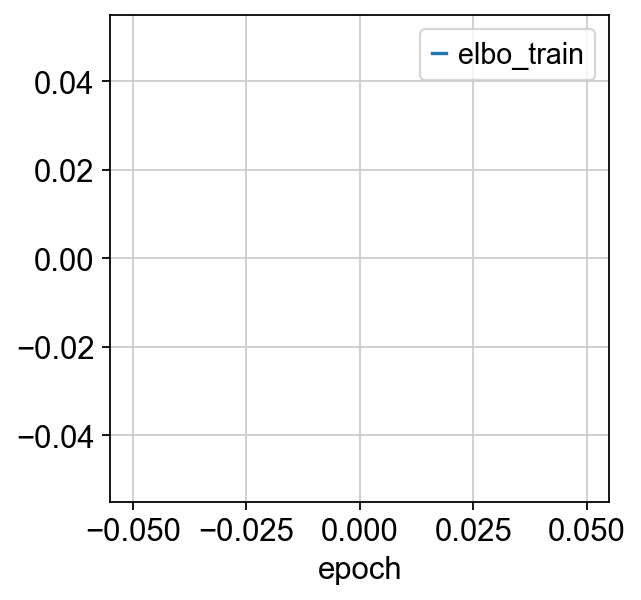

In [32]:
st_model.history["elbo_train"].iloc[10:].plot()
plt.show()

In [33]:
st_adata.obsm["proportions"] = st_model.get_proportions()

In [34]:
st_adata.obsm["proportions"].head(5)

,B.cell,Dendritic.cell,Endothelial.cell,Fibroblast,Mast.cell,Monocyte,Ovarian.cancer.cell,Plasma.cell,T.cell
AAACAAGTATCTCCCA-1,0.131003,0.186113,0.125788,0.078337,0.132146,0.094454,0.11539,0.06194,0.07483
AAACACCAATAACTGC-1,0.131003,0.186113,0.125788,0.078337,0.132146,0.094454,0.11539,0.06194,0.07483
AAACAGGGTCTATATT-1,0.131003,0.186113,0.125788,0.078337,0.132146,0.094454,0.11539,0.06194,0.07483
AAACATTTCCCGGATT-1,0.131003,0.186113,0.125788,0.078337,0.132146,0.094454,0.11539,0.06194,0.07483
AAACCCGAACGAAATC-1,0.131003,0.186113,0.125788,0.078337,0.132146,0.094454,0.11539,0.06194,0.07483


In [35]:
ct_list = ["B.cell", "Endothelial.cell", "Monocyte"]
for ct in ct_list:
    data = st_adata.obsm["proportions"][ct].values
    st_adata.obs[ct] = np.clip(data, 0, np.quantile(data, 0.99))

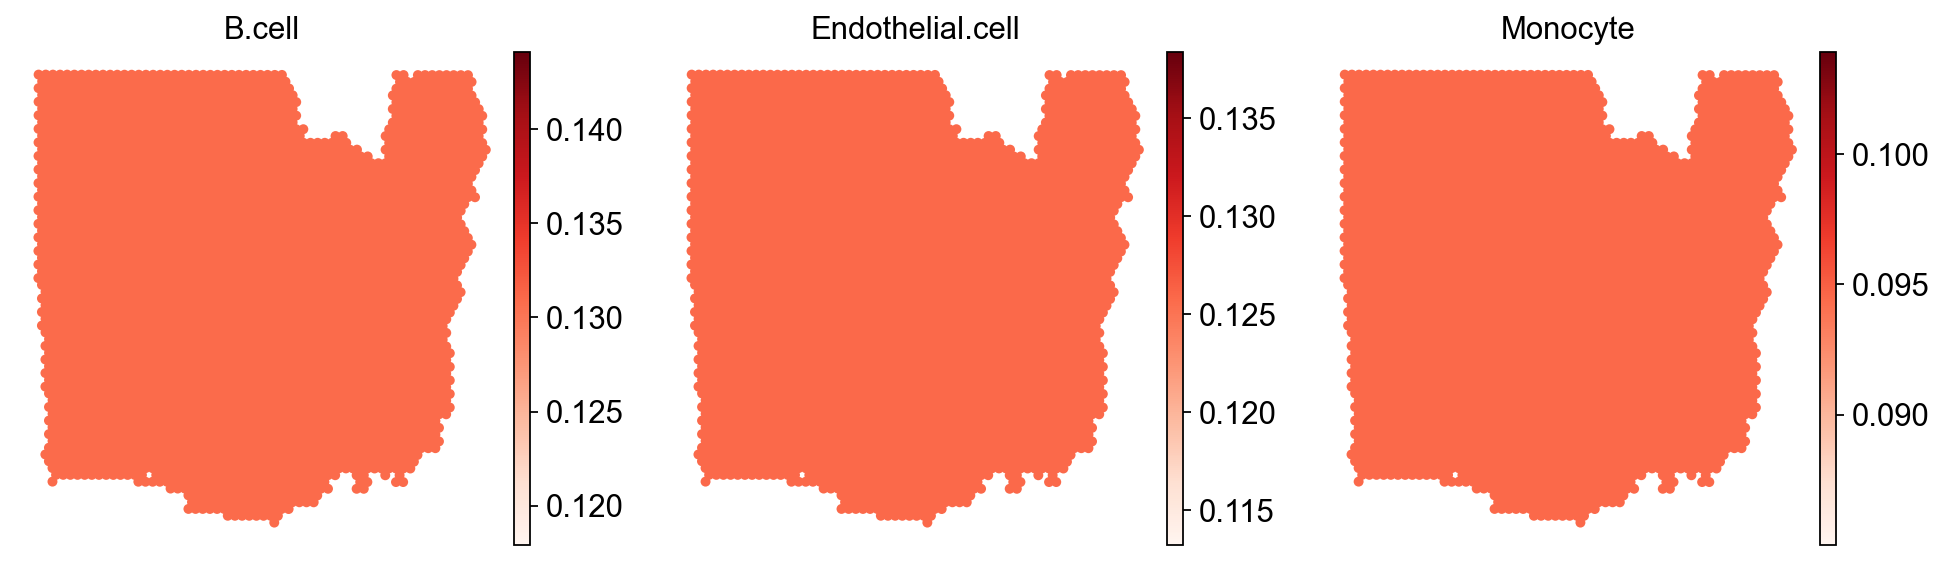

In [36]:
sc.pl.embedding(st_adata, basis="spatial", color=ct_list, cmap="Reds", s=80)